- **SUBMITTED BY: TAMANNA**
- **STUDENT ID: C0909095**

# ABOUT THE DATASET:

**Dataset Overview:**
- **Purpose:** To analyze factors contributing to forest fires and develop models for predicting whether fire will occur or not.
- **Origin:** The dataset is based on real historical data collected from the Algerian forests.


**Features:**
The dataset consists of the following features (variables):

- **Month:** The month when the data was recorded
- **Day:** The day of the week when the the data was recorded 
- **Year:** The year the data was recorded
- **FWI:** is Fair weather index which is part of a broader system of fire danger rating indices and is often used by fire management agencies and meteorologists to monitor and manage wildfire risks effectively.
- **FFMC:** Fine Fuel Moisture Code, indicating the moisture content of fine fuels.
- **DMC:** Duff Moisture Code, indicating the moisture content of the duff layer.
- **DC:** Drought Code, representing the moisture content of deep soil.
- **ISI**: Initial Spread Index, which indicates the rate of fire spread.
- **Temperature:** Temperature in Celsius at the time of the fire.
- **Relative Humidity(RH):** Relative humidity percentage.
- **WindSpeed(ws)**: Wind speed (in km/h) during the fire occurrence.
- **Rain:** Rainfall (in mm) at the time of the fire
- **Classes:** two classes, namely Fire and not Fire
- **Initial Spread Index (ISI)**: index from the FWI system: 0 to 18.5.The ISI provides an estimate of how fast a fire might spread at the beginning of an ignition. It helps in fire management and planning by predicting fire behavior.


# 1. DATA CLEANING AND PRE-PROCESSING
- Loading the Algerian forest fire dataset and displaying its structure.
- Dropping irrelevant columns (day, month, year).
- Encoding the target variable (Classes) using label encoding.

In [8]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import warnings  # Library to handle warnings
warnings.filterwarnings('ignore')  # Suppresses warnings to avoid cluttering the output

import pickle


In [10]:
# Load the dataset
df = pd.read_csv(r"C:\Users\taman\OneDrive\Documents\NN NOTES&HANDS ON\Assignment-1\Algerian_forest_fires_cleaned.csv")




In [12]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [16]:
# Descriptive summary
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [18]:
df.duplicated().sum()   # Finding duplicate records 

0

- There are no duplicate records in our dataset

In [20]:
# Checking if there are any duplicate values in the Classes column
df['Classes'].duplicated().any()

True

In [22]:
#Finding the total number of duplicate values in 'Classes' Column
df['Classes'].duplicated().sum() # Counts the total number of duplicate values in the 'Classes' column, ignoring the first occurrence of each value.

235

In [24]:
 # Counting records in classes
df['Classes'].value_counts() # value counts() counts how many times each unique value occurs in the 'Classes' column.



Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

- **After checking , we see that there are duplicate values in the 'Classes' Column. Therefore, we will remove the duplicates**


In [26]:
df['Classes'] = df['Classes'].str.strip()    # Striping trailing spaces

In [413]:
# Sfter stripping the trailing spaces, counting the values in 'Classes' column
df['Classes'].value_c
ounts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

- **It can be seen that both the classes have similar number of entries, therefore we have a balanced dataset**

In [28]:
# Feature Engineering
# Converting Target variable values into numerical values 
df['Classes'] = df['Classes'].map({'fire': 1, 'not fire': 0})   

- **For analysing the data, I have converted categorical variable to numerical values where :**
- **1 represents:'fire'**
-  **0 represents : 'not fire'**

In [30]:
# Displaying the classes in numerical form
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

# 2. DATA VISUALIZATIONS AND OBSERVATIONS
- Creating univariate and bivariate visualizations to understand the distributions and relationships between features.
- Generating multivariate visualizations such as a correlation heatmap and a 3D scatter plot.

- **Univariate visualizations:**  To help understand the distribution of individual features.
- Histogram
- Boxplot
- Countplot



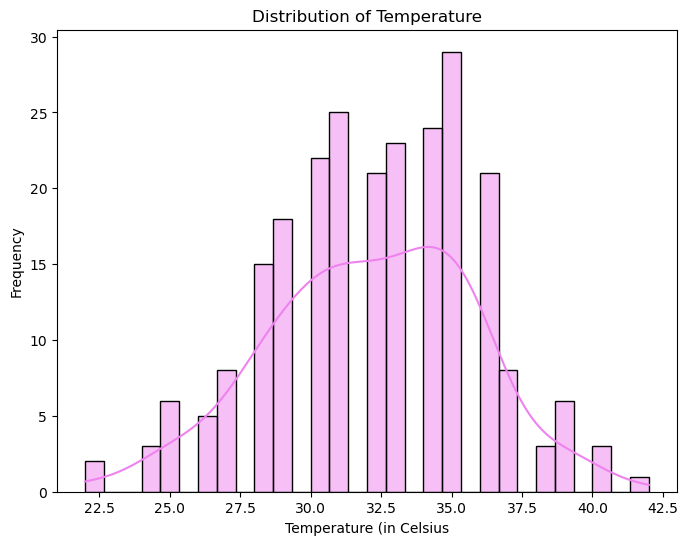

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate Visualization
# Histogram for 'Temperature'
plt.figure(figsize=(8, 6))
sns.histplot(df['Temperature'], bins=30, kde=True,color="violet")
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (in Celsius')
plt.ylabel('Frequency')
plt.show()


- The **KDE curve provides a smooth estimate of the temperature distribution**, which can help  identify where the densest concentration of temperature values is.This can give us a better idea of whether there's a single peak (unimodal) or multiple peaks (bimodal), which could indicate different temperature regimes where fires occur.
- As in the graph above, we can see **multiple peaks**, first one at 30 degree followed by another at 32.5 and the highest one being 35, which means there are multiple temperature values at which fire might occur.

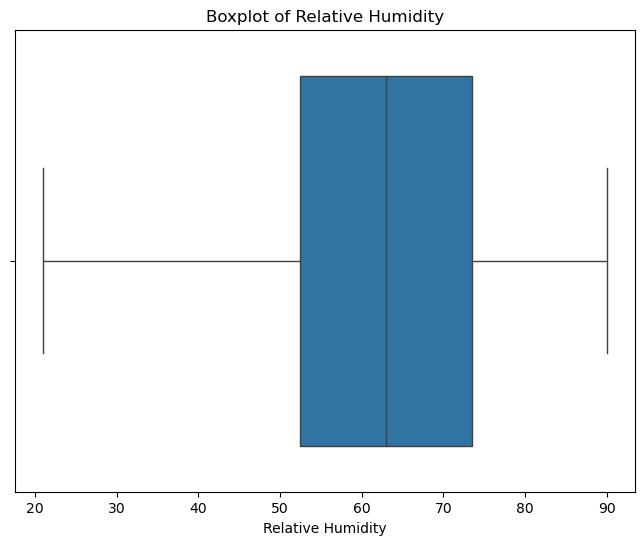

In [36]:
# Boxplot for 'RH' (Relative Humidity)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['RH'])
plt.title('Boxplot of Relative Humidity')
plt.xlabel('Relative Humidity')
plt.show()

- The **median** of relative humidity is around 63 which indicates that the central tendency of the data is around this value. This might suggest typical humidity conditions around this level.
- **Spread and Variability:** The size of the box (IQR) and the length of the whiskers show the spread of the data. Since we have a small box, it  indicates most values are tightly clustered around the median.

Text(0, 0.5, 'Count')

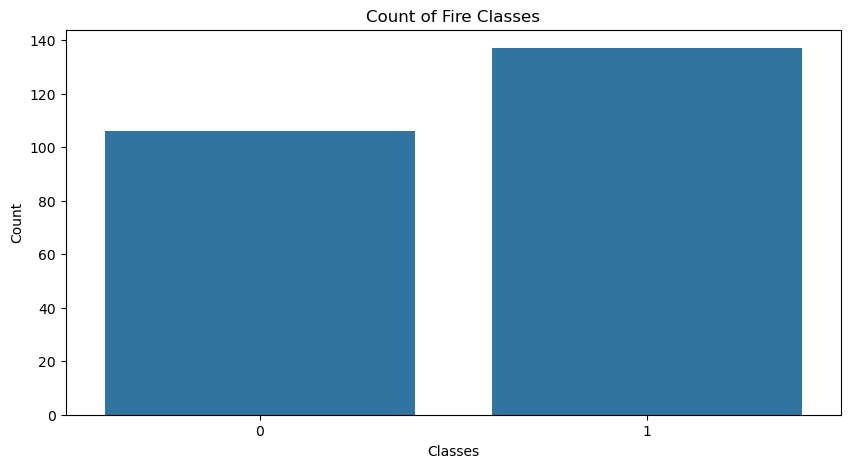

In [38]:
# Count plot for 'Classes'
plt.figure(figsize=(10, 5))
sns.countplot(x='Classes', data=df)
plt.title('Count of Fire Classes')
plt.xlabel('Classes')
plt.ylabel('Count')

- **The countplot() shows that the 'fire' class is higher in number than the 'not fire' class.Nonetheless, our dataset is balanced.**

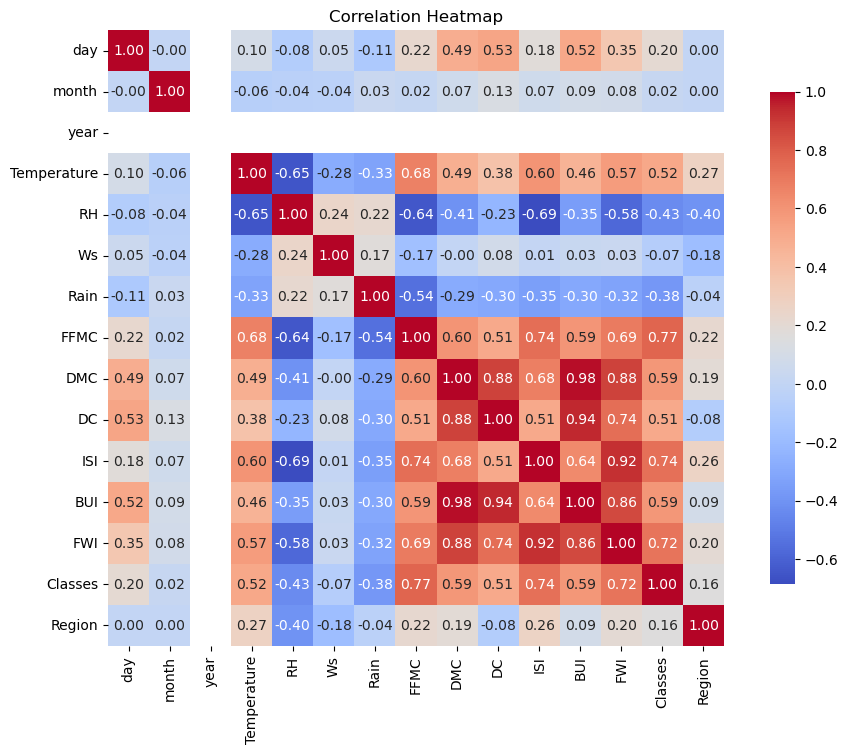

In [40]:
# Multivariate Visualization
# Heatmap for correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()


- **Columns like Temperature, FFMC ,ISI,FWI are highly correlated with the class feature. Thus, these are important for our analysis and we'll visualize and analyze their relation with classes column and each other.**



- **Bivariate visualizations:** To analyze relationships between two features.
- scatter plot between Temperature vs. Fire Weather Index (FWI)
- scatter plot between  ISI and Wind Speed



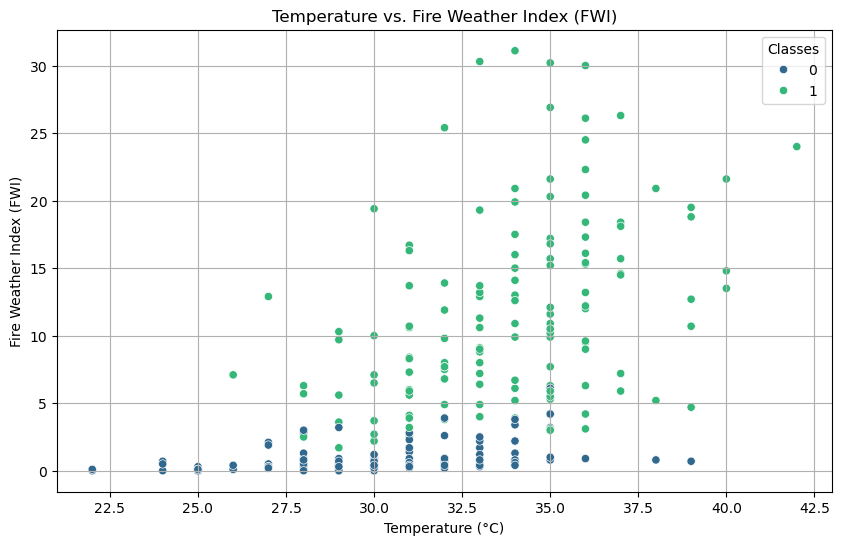

In [42]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='FWI', hue='Classes', data=df, palette='viridis')
plt.title('Temperature vs. Fire Weather Index (FWI)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Fire Weather Index (FWI)')
plt.grid()
plt.show()


- **It can be observed from the scatter plot above  that 'fire' (represented by green circles) is caused mainly when the Fair Weather Index(FWI) was higher than 5.**
- **The effect of temperature on fire is such that as it keeps increasing along with FWI, the fires are also increasing in number.**
- **The highest number of fires are observed between a temperature range of 27.5 to 37.5 degree Celsius.** 

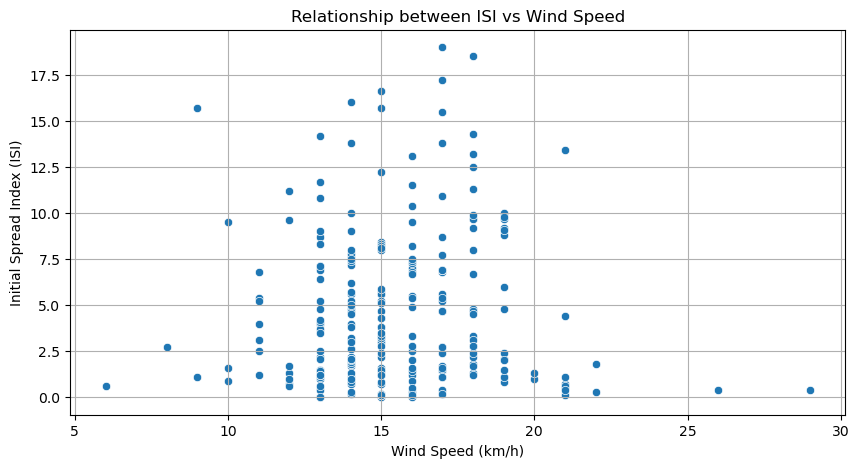

In [44]:
plt.figure(figsize=(10, 5))  # Set the figure size

# Create a scatter plot
sns.scatterplot(x='Ws', y='ISI', data=df)

# Set the title and labels
plt.title('Relationship between ISI vs Wind Speed')
plt.xlabel('Wind Speed (km/h)')  # Change the unit if necessary
plt.ylabel('Initial Spread Index (ISI)')

# Show grid for better readability
plt.grid(True)

# Display the plot
plt.show()


- **The ISI provides an estimate of how fast a fire might spread at the beginning of an ignition.**
- **The scatter plot shows that as the wind speed increases with each km/hour, the rate at which the fire spreads also increases simultaneously.**
- **When the wind speed is less, the ISI is relatively small , hence the fire spreads less through the forest.**
- **The highest ISI of 19,when the wind speed is around 17 km/hour**
- **Also, the fire spread faster even when the wind speed was less as seen in the graph at around 8km/hr and also spread fast in the range of wind speed being 10 to 20 km/hr.And spread less when the wind speed was too high in the range of 25-30km/hr**


# DATA PREPRATION
- Splitting the data into training and testing sets.
- Applying standard scaling for normalization.

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [48]:
# Define target variable (y) and features (X)
X = df[['Temperature', 'RH', 'Ws', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']]  # Considering the important features
y = df['Classes']# Target: fire or not fire

In [50]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# 3. MODEL DEVELOPMENT AND ANALYSIS
- Developing a Multiple Logistic Model.
- Evaluating model performance using metrics like Accuracy,precision,recall and R² score


In [54]:
# Importing necessary models and metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler

In [56]:
# Building the model

# Create a logistic regression model
logistic_model = LogisticRegression()



- It is a multiple logistic model as there are multiple features used to predict the target variable.

In [58]:
logistic_model = LogisticRegression()  

In [60]:
# Fitting the model
logistic_model.fit(X_train_scaled, y_train)


LogisticRegression()

In [62]:
# Making predictions
y_pred = logistic_model.predict(X_test_scaled)


# 4. MODEL EVALUATION AND TESTING

In [64]:
# Calculating evaluation metrics
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score,r2_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("For Multiple Logistic Regression:")
# Print the evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'r2 Score: {r2:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


For Multiple Logistic Regression:
Accuracy: 0.94
Precision: 0.96
r2 Score: 0.75
Recall: 0.93
F1 Score: 0.94
Confusion Matrix:
[[21  1]
 [ 2 25]]


### ANALYSIS:
- **Accuracy: 0.94** (The model correctly predicted whether there was a fire or not 94% of the time.Out of all the predictions (both "fire" and "not fire"), 94% were correct, meaning the model made the right call about fires occurring or not occurring in 94% of the cases.
  
- **Precision: 0.96**(96% of the instances predicted as "fire" were actually fires.The model rarely made mistakes when predicting a fire. A high precision means it didn't falsely label "not fire" situations as "fire" often, avoiding false positives.

- **R² Score: 0.75**(75% of the variability in fire occurrences is explained by the independent variables used in the model.
Explanation: This score shows that the model captures most of the patterns in the data but still leaves 25% unexplained, meaning there could be other factors influencing fire occurrence that the model didn't account for.)
  
- **Recall: 0.93**(93% of the times a fire occurred, the model correctly identified it as "fire.The model is good at catching true fire instances and minimizing false negatives (when a fire happens but the model predicts "not fire").
**Example:** If there were 100 real fires, the model correctly identified 93 of them as "fire" and missed 7 (false negatives).

- **F1 Score: 0.94**(The F1 score balances precision and recall, providing an overall measure of the model’s accuracy with respect to fire detection.
The F1 score of 0.94 means the model performs well overall, effectively balancing the ability to avoid false positives (high precision) and false negatives (high recall))
- The F1 score ensures that both the model’s ability to correctly identify fires and its ability to avoid false alarms are taken into account.
- **Confusion Matrix**: This matrix shows:

1. True Positives (TP): 25
The model correctly predicted 25 instances as "fire" when fire occurred.

2. True Negatives (TN): 21
The model correctly predicted 21 instances as "not fire" when no fire occurred.

3. False Positives (FP): 1
The model predicted "fire" in 1 instance where there was no fire (a false alarm).

4. False Negatives (FN): 2
The model predicted "not fire" in 2 instances where fire actually occurred (it missed 2 fires).

# CROSS VALIDATION AND HYPERPARAMETER TUNING

- In this analysis, we employ **cross-validation** to assess the model's performance more reliably. By dividing the dataset into multiple subsets (or folds), we can train the model on some folds while validating it on others. This process helps mitigate overfitting and provides a robust estimate of how well the model will generalize to unseen data.

- Additionally, we conduct **hyperparameter tuning** to optimize the model's performance. Hyperparameters are settings that dictate how the learning algorithm operates, and fine-tuning these parameters can significantly enhance the model's accuracy and robustness. By systematically exploring different hyperparameter combinations, we aim to identify the optimal settings that yield the best predictive performance.

In [66]:
# Cross- Validation & Hyperparameter Tuning
param_grid={"C":[0.01,0.1,1,10,100],
             "penalty":["l1","l2"],
            "class_weight":[None,"balanced"]}

In [70]:

grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, 
                           scoring='accuracy', cv=5)

# Fitting the grid search to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Best parameters from the grid search
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)
print(f"Best cross-validation score: {grid_search.best_score_}")



Best parameters found:  {'C': 10, 'class_weight': None, 'penalty': 'l2'}
Best cross-validation score: 0.9793522267206478



# Significance of Best Parameters and Cross-Validation Score

1. **C (Regularization Strength)**: The value of **C = 10** indicates the strength of regularization applied to the model. In logistic regression, a higher C value reduces the effect of regularization, allowing the model to fit the training data more closely. This suggests that the model has a good fit to the data without being overly complex, helping to prevent overfitting.

2. **Class Weight**: The parameter **class_weight = None** implies that the model treats all classes equally during training. This is significant in scenarios where class imbalance is not a concern, ensuring that the model's predictions are not biased toward any particular class.

3. **Penalty (L2)**: Using **L2 penalty** (also known as Ridge regularization) helps to penalize large coefficients in the model, promoting simpler models with smaller weights. This improves generalization by reducing the risk of overfitting to the training data.

4. **Cross-Validation Score (0.9794)**: This high cross-validation score indicates that the model performs well across different subsets of the data. It suggests that the model is likely to maintain its performance when applied to unseen data, reflecting its robustness and effectiveness in making accurate predictions.

Overall, these results imply that the model is well-tuned and has a strong capacity for generalization, making it suitable for real-world applications in predicting outcomes based on the Algerian forest fire dataset.


In [72]:
# Using the best model to make predictions on the scaled test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

In [87]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("After CV and Hyperparameter Tuning:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f'Precision: {precision:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'r2 Score: {r2:.2f}')
print("Confusion Matrix\n",confusion_matrix(y_test, y_pred))

After CV and Hyperparameter Tuning:
Accuracy: 0.98
Recall: 0.96
Precision: 1.00
F1 Score: 0.98
r2 Score: 0.92
Confusion Matrix
 [[22  0]
 [ 1 26]]


# Analysis of performance of model before and after hyperparameter tuning::
- **Accuracy** improved from 0.94 to 0.98, meaning the model makes fewer incorrect predictions overall.
- **Precision** increased from 0.96 to a perfect 1.00, eliminating false positives (wrongly predicting "fire" when there’s no fire).
- **Recall** increased from 0.93 to 0.96, meaning the model now catches more true fire instances.
- **F1 Score** increased from 0.94 to 0.98, reflecting a better balance between precision and recall.
- **R² Score** increased from 0.75 to 0.92, meaning the model now captures more of the factors influencing fire occurrences.
- **Confusion Matrix**:
- Before tuning: The model was good but had minor issues with false positives (1) and false negatives (2).
- After tuning: The model has eliminated false positives (FP = 0) and reduced false negatives to just 1, leading to perfect precision and improved recall.

# Conclusion:
1. **Importance of Cross-Validation and Hyperparameter Tuning:** This process significantly improved the model by finding the optimal parameter settings, resulting in a model that performs much better in avoiding false positives and detecting actual fires.
2. **Real-World Applicability:** The model after hyperparameter tuning, with its high precision and recall, is better suited for applications like forest fire detection, where false positives (false alarms) and false negatives (missed fires) could have serious consequences.
3. **Model Confidence:** The final model is reliable for making predictions, with minimal error in predicting both fire and non-fire situations, thus making it a robust choice for deployment in similar fire detection problems.

# Recommendation:
The tuned logistic regression model, with its high precision, recall, and accuracy, should be implemented as the primary model for fire detection. It has been fine-tuned to minimize errors, making it an effective and reliable tool for predicting fire occurrences.

**Using the pickle module to save your trained logistic regression model and the scaler used for feature scaling into separate files in order to test unssen data on this tuned model**

In [98]:
import pickle

# Saving the trained logistic regression model to a file
with open('logistic_regression_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

# Saving the scaler used for feature scaling to a file
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)